In [1]:

import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
from glob import glob
train_image_path='/Users/anik_singhal/Desktop/Projects/makathon/dataset/chest_xray/train'
train_image=glob(train_image_path+'/*/*.jp*g')
len(train_image)

5216

In [3]:
test_image_path='/Users/anik_singhal/Desktop/Projects/makathon/dataset/chest_xray/test'
test_image=glob(test_image_path+'/*/*.jp*g')
len(test_image)

624

In [4]:
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator=ImageDataGenerator(rescale=1./255,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True)


In [5]:
test_data_generator=ImageDataGenerator(rescale=1./255,shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True)

In [6]:
train_data=train_data_generator.flow_from_directory(train_image_path,
                                                   target_size=(64,64),
                                                   batch_size=32,
                                                   class_mode='binary')
test_data=test_data_generator.flow_from_directory(test_image_path,
                                                 target_size=(64,64),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# training CNN model

In [7]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPool2D
from tensorflow.keras.models import Model

input_layer = Input(shape=(64, 64, 3))  # Define the input shape without the batch dimension
conv1 = Conv2D(16, (3, 3), strides=1, activation='relu')(input_layer)
maxpool1 = MaxPool2D(2, 2)(conv1)
conv2 = Conv2D(32, (3, 3), strides=1, activation='relu')(maxpool1)
maxpool2 = MaxPool2D(2, 2)(conv2)
conv3 = Conv2D(16, (3, 3), strides=1, activation='relu')(maxpool2)
maxpool3 = MaxPool2D(2, 2)(conv3)
flat = Flatten()(maxpool3)
dense1 = Dense(16, activation='relu')(flat)
output_layer = Dense(1, activation='sigmoid')(dense1)

model = Model(input_layer, output_layer)


In [8]:
from tensorflow.keras.optimizers import Adam
adam=Adam(learning_rate=0.0001)
model.compile(optimizer=adam,
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [9]:

# from tensorflow.keras.utils import plot_model
# plot_model(model, show_shapes=True, show_layer_names=True)

In [10]:

step_per_epoch=int(len(train_image)/32)-1
validation_step=int(len(test_image)/32)-1
step_per_epoch


162

In [11]:
# training the CNN model

model_history=model.fit(train_data, steps_per_epoch=step_per_epoch, epochs=5,
                       validation_data=test_data, validation_steps=validation_step)


Epoch 1/5
162/162 [==============================] - 30s 182ms/step - loss: 0.5788 - accuracy: 0.7215 - val_loss: 0.6768 - val_accuracy: 0.6233
Epoch 2/5
162/162 [==============================] - 29s 182ms/step - loss: 0.4936 - accuracy: 0.7550 - val_loss: 0.5424 - val_accuracy: 0.6892
Epoch 3/5
162/162 [==============================] - 30s 183ms/step - loss: 0.3577 - accuracy: 0.8468 - val_loss: 0.4315 - val_accuracy: 0.8108
Epoch 4/5
162/162 [==============================] - 30s 183ms/step - loss: 0.2881 - accuracy: 0.8789 - val_loss: 0.4072 - val_accuracy: 0.8299
Epoch 5/5
162/162 [==============================] - 30s 183ms/step - loss: 0.2626 - accuracy: 0.8904 - val_loss: 0.3878 - val_accuracy: 0.8333


In [12]:
model_history.history

{'loss': [0.5787624716758728,
  0.49357694387435913,
  0.35774022340774536,
  0.28809261322021484,
  0.262620210647583],
 'accuracy': [0.7214506268501282,
  0.7550154328346252,
  0.8468364477157593,
  0.8788580298423767,
  0.8904321193695068],
 'val_loss': [0.6767999529838562,
  0.5423596501350403,
  0.43145713210105896,
  0.4072483479976654,
  0.38784259557724],
 'val_accuracy': [0.6232638955116272,
  0.6892361044883728,
  0.8107638955116272,
  0.8298611044883728,
  0.8333333134651184]}

In [13]:
model.evaluate(test_data)

20/20 [==============================] - 3s 128ms/step - loss: 0.3696 - accuracy: 0.8413


[0.3696334660053253, 0.8413461446762085]

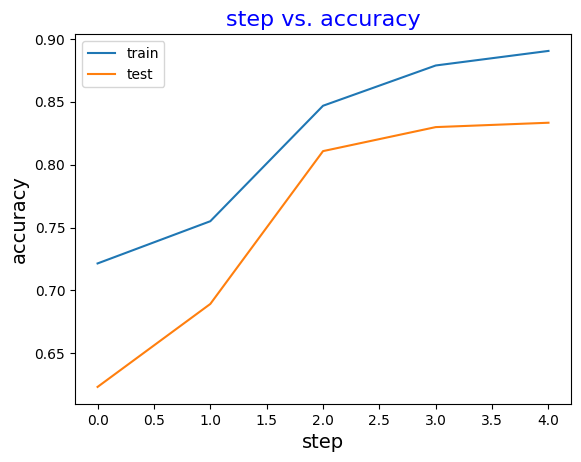

In [14]:
# evaluating model
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'], label='train')
plt.plot(model_history.history['val_accuracy'], label='test')
plt.title('step vs. accuracy', size=16, c='b')
plt.xlabel('step', size=14)
plt.ylabel('accuracy', size=14)
plt.legend(loc='best')
plt.show()

## according to the graph of accuracy vs. step, this model overfits (considering the accuracy of train is higher than that of test).
# we can control several parameters to avoid this overfitting.
# CNN model's accuracy is quite high (0.85 ~ 0.92)

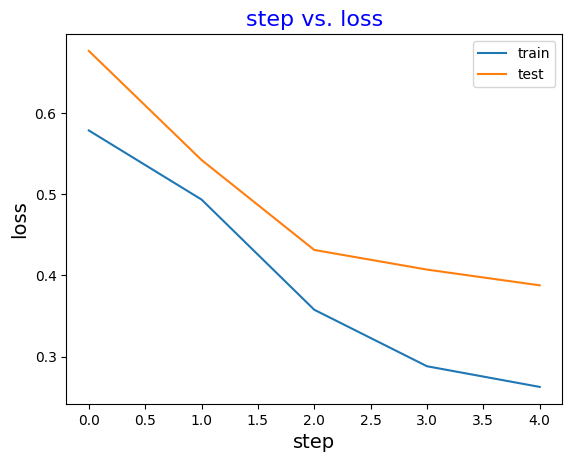

In [15]:
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.title('step vs. loss', size=16, c='b')
plt.xlabel('step', size=14)
plt.ylabel('loss', size=14)
plt.legend(loc='best')
plt.show()

In [16]:
# making predictions on a single image(Normal)
from tensorflow.keras.preprocessing.image import load_img, img_to_array

file_path='/Users/anik_singhal/Desktop/Projects/makathon/dataset/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg'

# load the image
img=load_img(file_path, target_size=(64,64))
# convert to array
img=img_to_array(img)
img

array([[[  0.,   0.,   0.],
        [ 56.,  56.,  56.],
        [ 23.,  23.,  23.],
        ...,
        [103., 103., 103.],
        [ 26.,  26.,  26.],
        [ 26.,  26.,  26.]],

       [[ 77.,  77.,  77.],
        [120., 120., 120.],
        [ 47.,  47.,  47.],
        ...,
        [ 20.,  20.,  20.],
        [ 22.,  22.,  22.],
        [ 16.,  16.,  16.]],

       [[ 65.,  65.,  65.],
        [ 78.,  78.,  78.],
        [110., 110., 110.],
        ...,
        [ 19.,  19.,  19.],
        [ 20.,  20.,  20.],
        [ 16.,  16.,  16.]],

       ...,

       [[ 12.,  12.,  12.],
        [ 19.,  19.,  19.],
        [ 14.,  14.,  14.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  8.,   8.,   8.],
        [  9.,   9.,   9.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  1.,  

In [17]:
img.shape

(64, 64, 3)

In [18]:
# reshape into (1, 64, 64, 3)
img=img.reshape(1,64,64,3)

In [28]:
img_pred=model.predict(img)
print(img_pred)


# since 0 indicates normal case (not pneumonia), the prediction is right

1/1 [==============================] - 0s 11ms/step
[[0.]]


In [20]:
# making predictions on a single image (pneumonia)
from tensorflow.keras.preprocessing.image import load_img, img_to_array

file_path2='/Users/anik_singhal/Desktop/Projects/makathon/dataset/WhatsApp Image 2024-02-24 at 16.28.48.jpeg'

# load the image
img2=load_img(file_path2, target_size=(64,64))
# convert to array
img2=img_to_array(img2)
img2

array([[[  8.,   8.,   8.],
        [  8.,   8.,   8.],
        [  8.,   8.,   8.],
        ...,
        [  3.,   3.,   3.],
        [  4.,   4.,   4.],
        [  4.,   4.,   4.]],

       [[  7.,   7.,   7.],
        [  8.,   8.,   8.],
        [  7.,   7.,   7.],
        ...,
        [ 18.,  18.,  18.],
        [  0.,   0.,   0.],
        [  3.,   3.,   3.]],

       [[  8.,   8.,   8.],
        [  7.,   7.,   7.],
        [  6.,   6.,   6.],
        ...,
        [ 41.,  41.,  41.],
        [ 29.,  29.,  29.],
        [ 16.,  16.,  16.]],

       ...,

       [[ 56.,  56.,  56.],
        [ 93.,  93.,  93.],
        [118., 118., 118.],
        ...,
        [164., 164., 164.],
        [118., 118., 118.],
        [ 92.,  92.,  92.]],

       [[ 48.,  48.,  48.],
        [ 89.,  89.,  89.],
        [113., 113., 113.],
        ...,
        [163., 163., 163.],
        [110., 110., 110.],
        [ 87.,  87.,  87.]],

       [[ 46.,  46.,  46.],
        [ 82.,  82.,  82.],
        [110., 1

In [21]:


# since 1 indicates pneumonia case, the prediction is right

In [26]:
# # Save model using TensorFlow's built-in saving functionality
model.save("model.h5")
# import torch
# import torch.nn as nn


# # Load the TensorFlow model
# tf_model = tf.keras.models.load_model('model.h5')

# # Extract the architecture
# tf_model.summary()

# # Create a corresponding PyTorch model
# class PyTorchModel(nn.Module):
#     def __init__(self):
#         super(PyTorchModel, self).__init__()
#         # Define layers similar to the TensorFlow model
#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
#         # Add more layers as needed
    
#     def forward(self, x):
#         # Define the forward pass similar to the TensorFlow model
#         x = self.conv1(x)
#         # Add more layers as needed
#         return x

# # Instantiate the PyTorch model
# pytorch_model = PyTorchModel()

# # Copy the weights
# for idx, layer in enumerate(tf_model.layers):
#     if isinstance(layer, tf.keras.layers.Conv2D):
#         # Transfer weights for Conv2D layers
#         weight, bias = layer.get_weights()
#         pytorch_model.conv1.weight.data = torch.tensor(weight.transpose(3, 2, 0, 1))
#         pytorch_model.conv1.bias.data = torch.tensor(bias)

# # Test the PyTorch model
# # Prepare some sample input data
# sample_input = torch.randn(1, 3, 224, 224)  # Assuming input shape (batch_size, channels, height, width)

# # Forward pass through the PyTorch model
# output_pytorch = pytorch_model(sample_input)

# # Forward pass through the TensorFlow model for comparison
# output_tf = tf_model.predict(sample_input.numpy())

# # Compare outputs (if necessary)
# print('PyTorch output:', output_pytorch)
# print('TensorFlow output:', output_tf)



In [23]:
# from ultralytics import YOLO
# model1 = YOLO("model.h5") # load the model
# results = model1.train(data="coco128.yaml", epochs=100)
# results = model1("./image.png")